In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'api_keys'

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1  # Reset record count for each new set of 50 cities

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"  # Replace api_key with your actual API key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | weno
Processing Record 2 of Set 1 | andahuaylas
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | coahuayana de hidalgo
Processing Record 8 of Set 1 | kapuskasing
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | jilib
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | pacific grove
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | ixtapa
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | at

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df["City"].count()
print(f"Record Count: {record_count}")


Record Count: 567


In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,weno,7.4515,151.8468,28.97,84,75,2.06,FM,1692710212
1,andahuaylas,-13.6556,-73.3872,12.38,68,22,1.72,PE,1692710212
2,adamstown,-25.0660,-130.1015,18.86,68,100,13.55,PN,1692710212
3,west island,-12.1568,96.8225,26.99,78,100,10.29,CC,1692710129
4,bredasdorp,-34.5322,20.0403,17.79,57,2,13.59,ZA,1692710213


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,weno,7.4515,151.8468,28.97,84,75,2.06,FM,1692710212
1,andahuaylas,-13.6556,-73.3872,12.38,68,22,1.72,PE,1692710212
2,adamstown,-25.0660,-130.1015,18.86,68,100,13.55,PN,1692710212
3,west island,-12.1568,96.8225,26.99,78,100,10.29,CC,1692710129
4,bredasdorp,-34.5322,20.0403,17.79,57,2,13.59,ZA,1692710213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

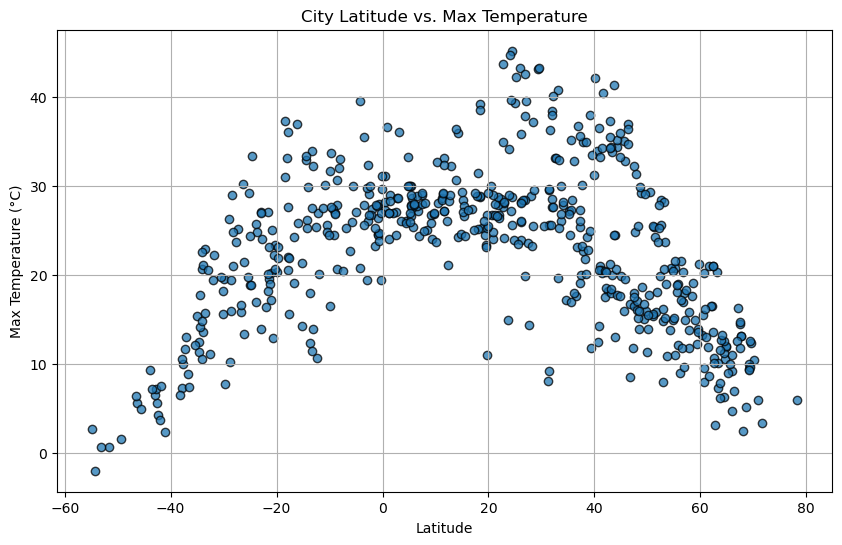

In [18]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

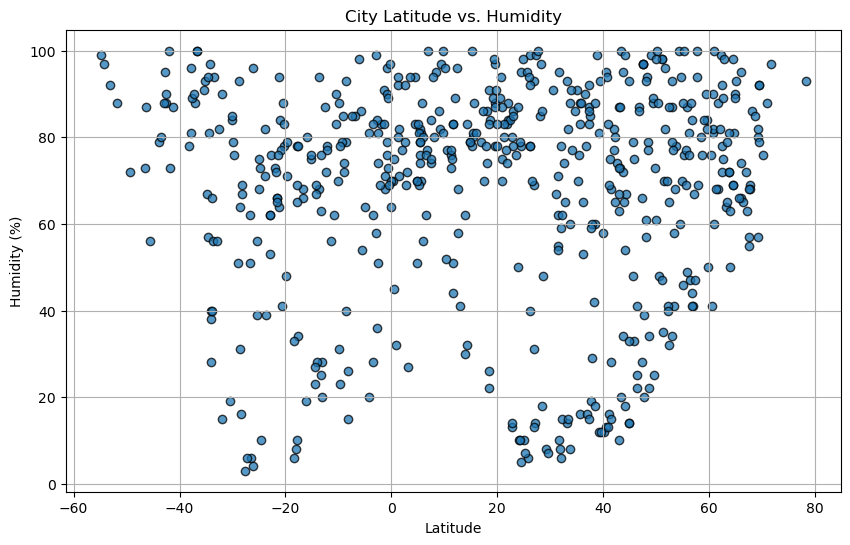

In [19]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

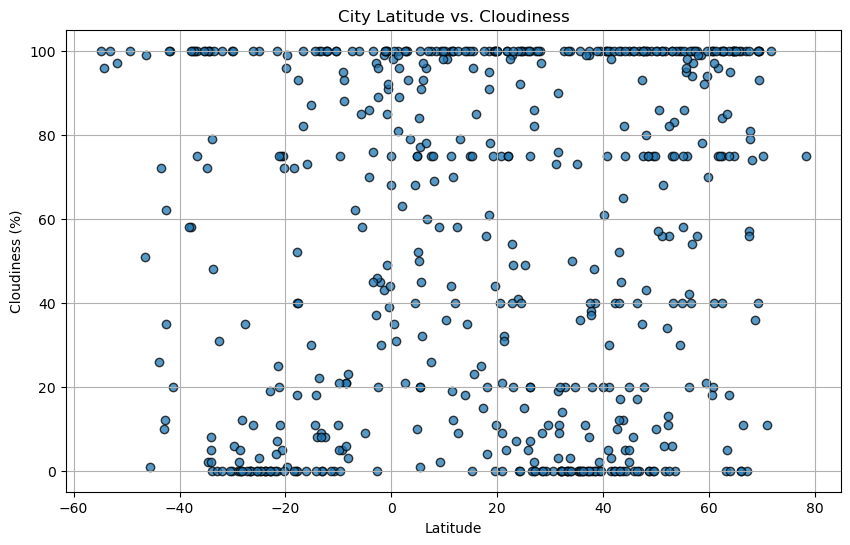

In [20]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

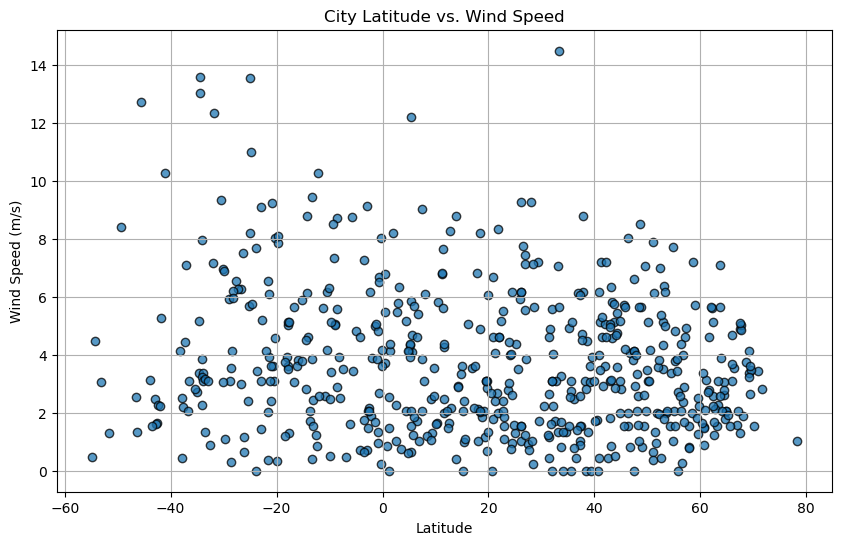

In [21]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


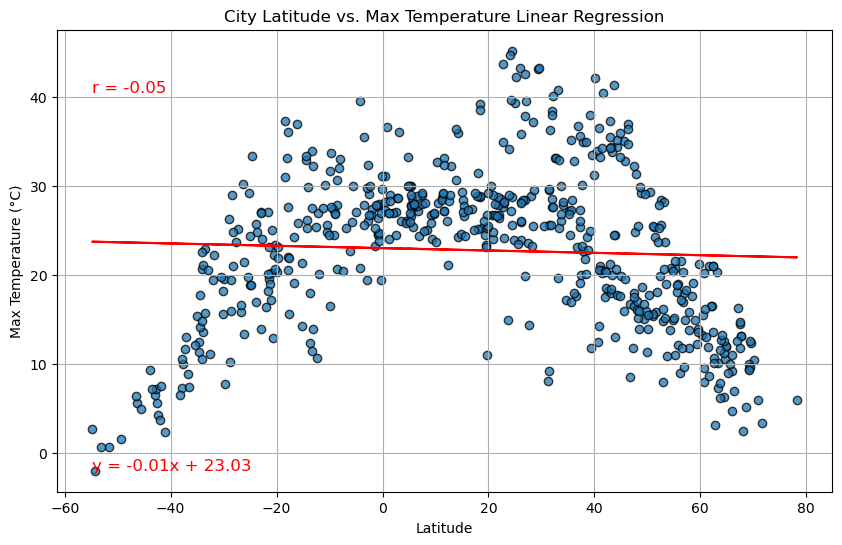

In [23]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot with linear regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    plt.plot(x_values, regression_line, color="red")

    # Incorporate the graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Display the linear equation and correlation coefficient on the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    correlation = f"r = {r_value:.2f}"
    plt.annotate(equation, (x_values.min(), y_values.min()), fontsize=12, color="red")
    plt.annotate(correlation, (x_values.min(), y_values.min() + (y_values.max() - y_values.min()) * 0.9), fontsize=12, color="red")

    # Save the figure
    plt.savefig(save_filename)

    # Show the plot
    plt.show()

# Example usage
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (°C)", "City Latitude vs. Max Temperature Linear Regression", "../output_data/Temp_Lat_LR.png")


In [24]:
# Filter the DataFrame for Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,weno,7.4515,151.8468,28.97,84,75,2.06,FM,1692710212
5,yellowknife,62.4560,-114.3525,13.56,92,75,2.57,CA,1692710213
6,coahuayana de hidalgo,18.7000,-103.6583,25.27,84,78,1.85,MX,1692710214
7,kapuskasing,49.4169,-82.4331,15.05,88,75,1.54,CA,1692710214
12,bethel,41.3712,-73.4140,20.20,68,0,4.63,US,1692710215


In [25]:
# Filter the DataFrame for Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,andahuaylas,-13.6556,-73.3872,12.38,68,22,1.72,PE,1692710212
2,adamstown,-25.0660,-130.1015,18.86,68,100,13.55,PN,1692710212
3,west island,-12.1568,96.8225,26.99,78,100,10.29,CC,1692710129
4,bredasdorp,-34.5322,20.0403,17.79,57,2,13.59,ZA,1692710213
8,carnarvon,-24.8667,113.6333,18.86,73,0,11.02,AU,1692710214


###  Temperature vs. Latitude Linear Regression Plot

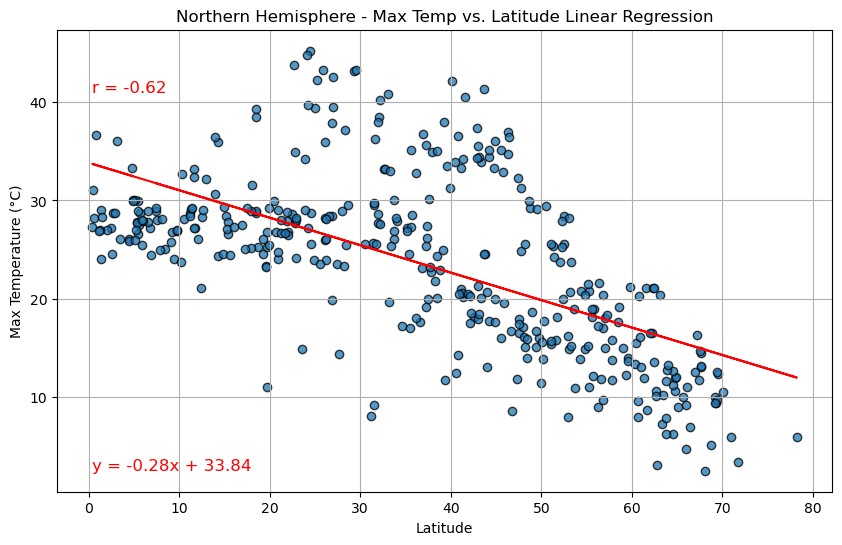

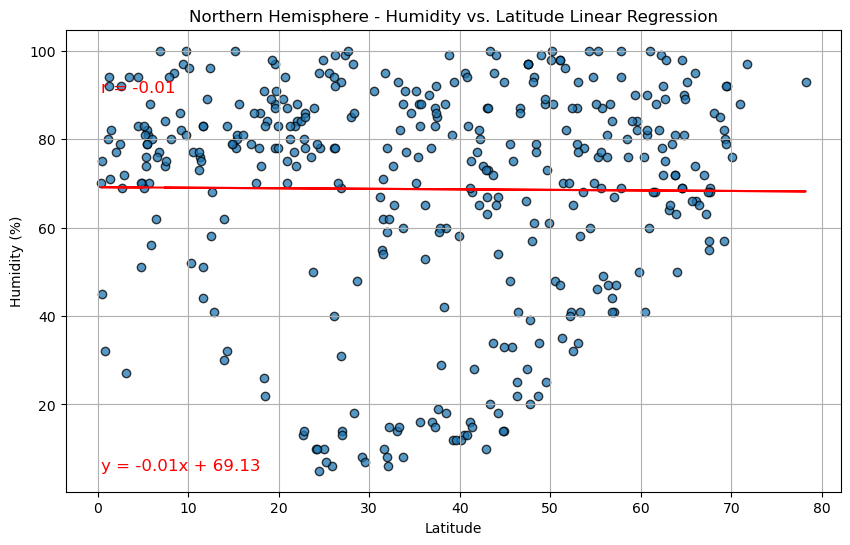

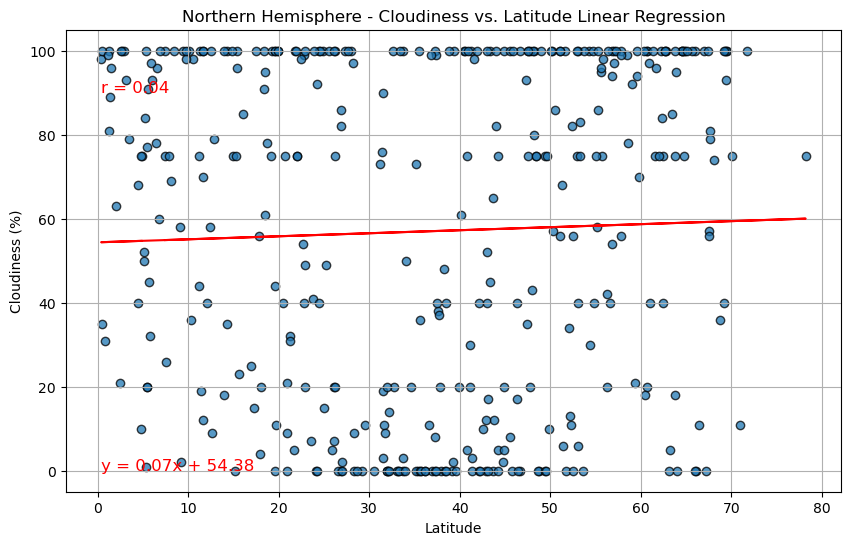

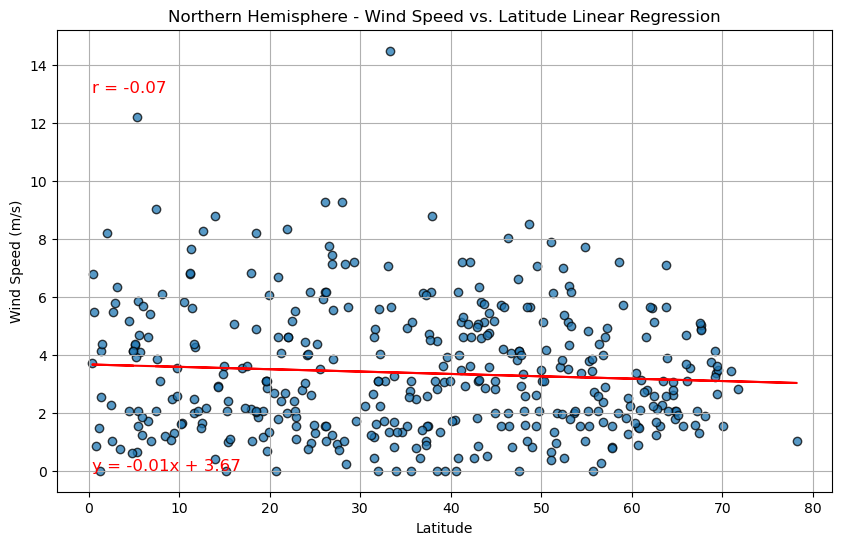

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot with linear regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    plt.plot(x_values, regression_line, color="red")

    # Incorporate the graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Display the linear equation and correlation coefficient on the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    correlation = f"r = {r_value:.2f}"
    plt.annotate(equation, (x_values.min(), y_values.min()), fontsize=12, color="red")
    plt.annotate(correlation, (x_values.min(), y_values.min() + (y_values.max() - y_values.min()) * 0.9), fontsize=12, color="red")

    # Save the figure
    plt.savefig(save_filename)

    # Show the plot
    plt.show()

# Perform linear regression for Northern Hemisphere data (Latitude >= 0)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", "../output_data/Northern_Hemi_Temp_Lat_LR.png")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", "../output_data/Northern_Hemi_Humidity_Lat_LR.png")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", "../output_data/Northern_Hemi_Cloudiness_Lat_LR.png")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", "../output_data/Northern_Hemi_Wind_Speed_Lat_LR.png")


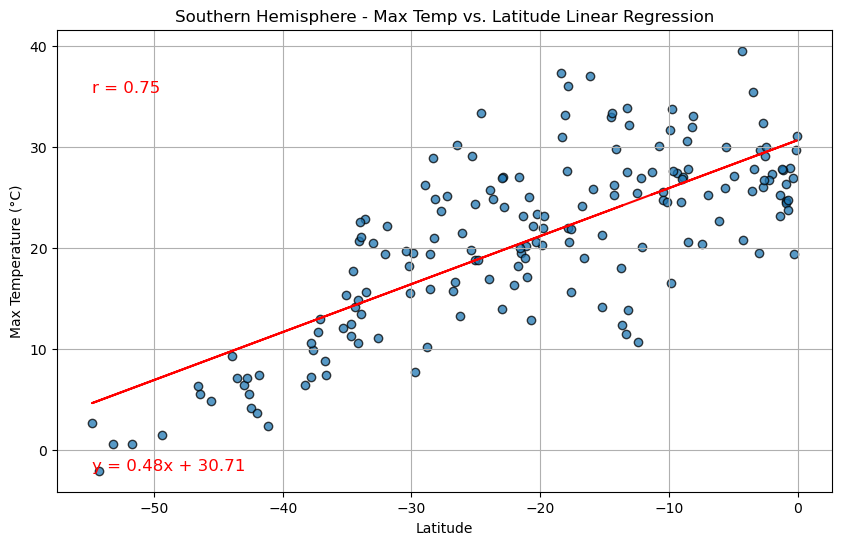

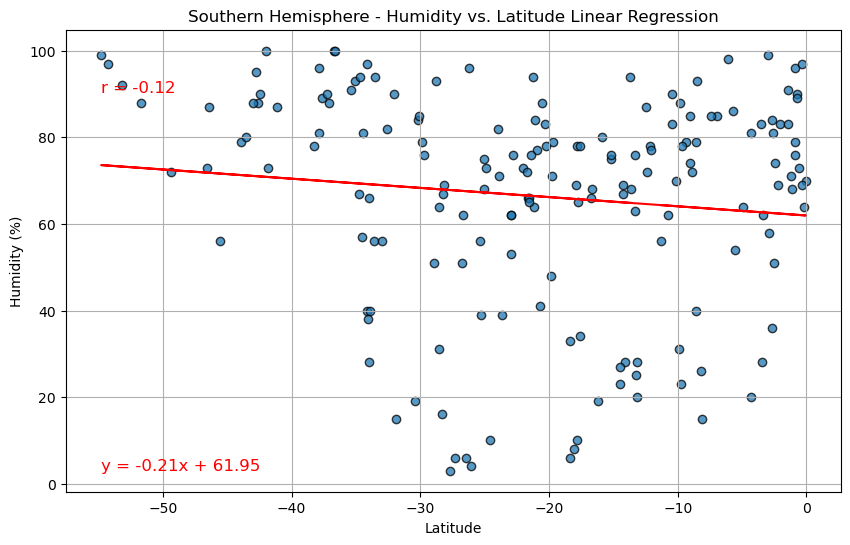

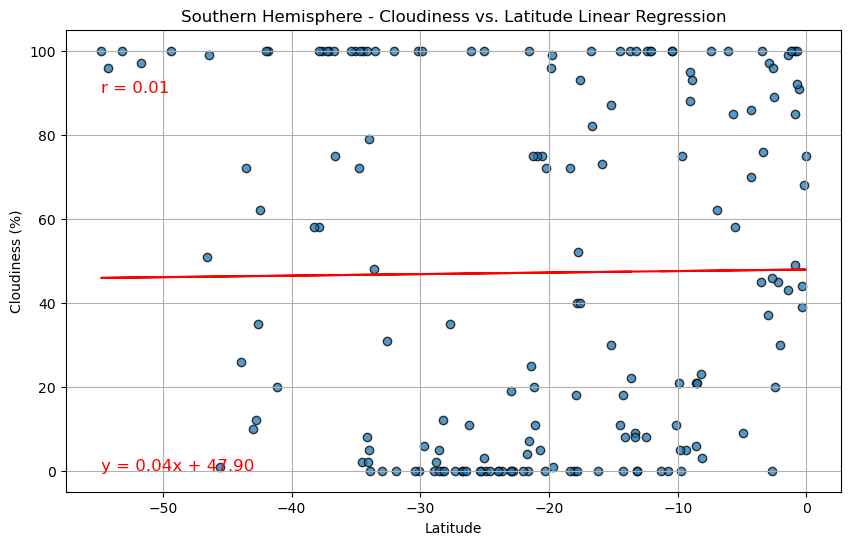

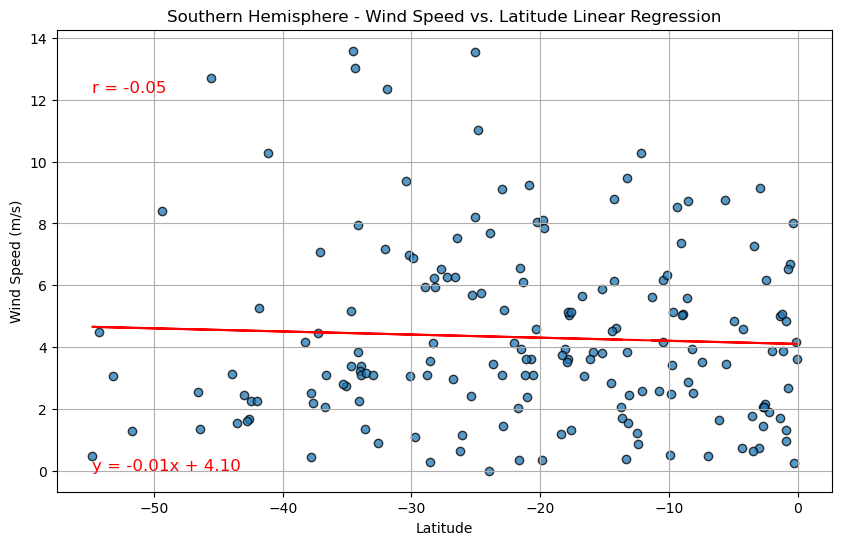

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot with linear regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    plt.plot(x_values, regression_line, color="red")

    # Incorporate the graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Display the linear equation and correlation coefficient on the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    correlation = f"r = {r_value:.2f}"
    plt.annotate(equation, (x_values.min(), y_values.min()), fontsize=12, color="red")
    plt.annotate(correlation, (x_values.min(), y_values.min() + (y_values.max() - y_values.min()) * 0.9), fontsize=12, color="red")

    # Save the figure
    plt.savefig(save_filename)

    # Show the plot
    plt.show()

# Perform linear regression for Southern Hemisphere data (Latitude < 0)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", "../output_data/Southern_Hemi_Temp_Lat_LR.png")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", "../output_data/Southern_Hemi_Humidity_Lat_LR.png")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", "../output_data/Southern_Hemi_Cloudiness_Lat_LR.png")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", "../output_data/Southern_Hemi_Wind_Speed_Lat_LR.png")


In [ ]:
Max Temperature vs. Latitude:

In the Northern Hemisphere, there is a clear negative linear relationship between latitude and maximum temperature. 
As latitude increases (moving towards the North Pole), the temperature tends to decrease. 
This is consistent with the expected pattern of colder temperatures in higher latitudes.

In the Southern Hemisphere, there is a positive linear relationship between latitude and maximum temperature. 
As latitude decreases (moving towards the South Pole), the temperature tends to increase. 
This is also consistent with the expected pattern of warmer temperatures in lower latitudes.

In [ ]:
Humidity vs. Latitude:

There is a weak to no clear linear relationship between latitude and humidity in both hemispheres. 
The scatter plots appear to be more dispersed, indicating that latitude alone may not be a strong predictor of humidity.

In [ ]:
Cloudiness vs. Latitude:

There is no strong linear relationship between latitude and cloudiness in either hemisphere. 
Cloudiness seems to be distributed across various latitudes without a clear trend.

In [ ]:
Wind Speed vs. Latitude:

In general, there is a weak linear relationship between latitude and wind speed in both hemispheres. 
The scatter plots show that wind speed tends to be higher in some regions, especially in the Northern Hemisphere, but the relationship is not very strong.